In [ ]:
from scipy import *
from pylab import *
from numpy import *
from PIL import Image
import cv2
from scipy.ndimage import measurements, morphology
figure()
im = cv2.imread('../img/papel2.jpg')
subplot(2,2,1)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
imshow(im)
im = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
im[:,:,2] = (im[:,:,0] >= 8) * im[:,:,2] 
im[:,:,2] = (im[:,:,0] < 22) * im[:,:,2]
im[:,:,2] = (im[:,:,1] > 80) * im[:,:,2]
im = cv2.cvtColor(cv2.cvtColor(im, cv2.COLOR_HSV2BGR),cv2.COLOR_BGR2GRAY)
subplot(2,2,2)
gray()
imshow(im)
im = 1*(im>90)
subplot(2,2,3)
imshow(im)
im_open = morphology.binary_opening(im, ones(( 100,100)), iterations=1)
im_closed = morphology.binary_closing(im, ones((20,20)))
subplot(2,2,4)
imshow(im_closed)
labels, nbr_objects = measurements.label(im_closed)
center_of_mass = array(measurements.center_of_mass(im_closed, labels=labels, index=range(1,nbr_objects+1) ), dtype=float)
print(center_of_mass)
print("number of objects: "+str(nbr_objects)+"    labels:"+str(labels.shape))
figure(figsize=(20,100))
gray()
imshow(im_closed)

for i in range(nbr_objects):
    text(center_of_mass[i][1], center_of_mass[i][0], 'Objeto', color='black', horizontalalignment='center',verticalalignment='center')

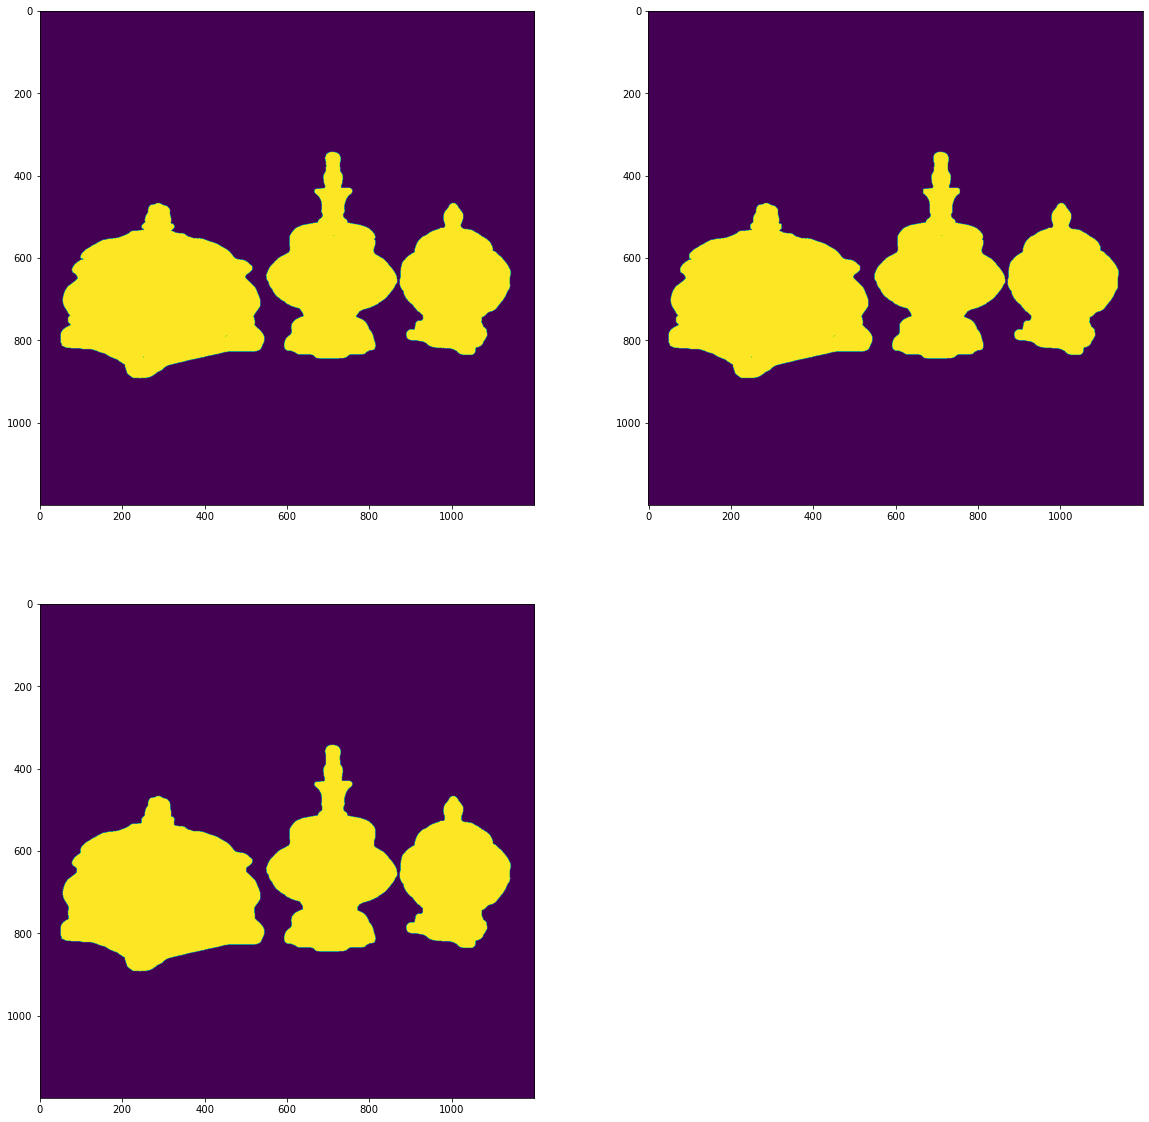

In [2]:
figure(figsize=(20,20))
subplot(2,2,1)
imshow(im)
subplot(2,2,2)
imshow(im_open)
subplot(2,2,3)
imshow(im_closed)

In [67]:
import cv2
from pylab import *

a = cv2.imread('segmentacaoCores/papel1.jpg')
a = cv2.cvtColor(a, cv2.COLOR_BGR2HSV)
a[:,:,2] = (a[:,:,0] >= 10) * a[:,:,2]
a[:,:,2] = (a[:,:,0] < 30) * a[:,:,2]
a = cv2.cvtColor(a, cv2.COLOR_HSV2RGB)
print(a.max())

255


[255 127   0]


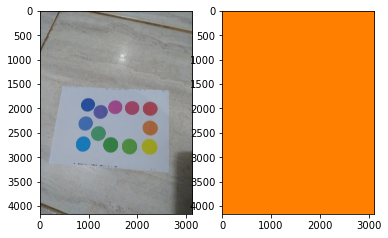

In [20]:
from scipy import *
from pylab import *
from numpy import *
from PIL import Image
import cv2
from scipy.ndimage import measurements, morphology
figure()
im = cv2.imread('segmentacaoCores/papel2.jpg')
subplot(1,2,1)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
imshow(im)
im_hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
im_hsv[:,:,:] = 255
im_hsv[:,:,0] = 15
im_hsv = cv2.cvtColor(im_hsv, cv2.COLOR_HSV2RGB)
subplot(1,2,2)
imshow(im_hsv)
print(im_hsv[0,0,:])

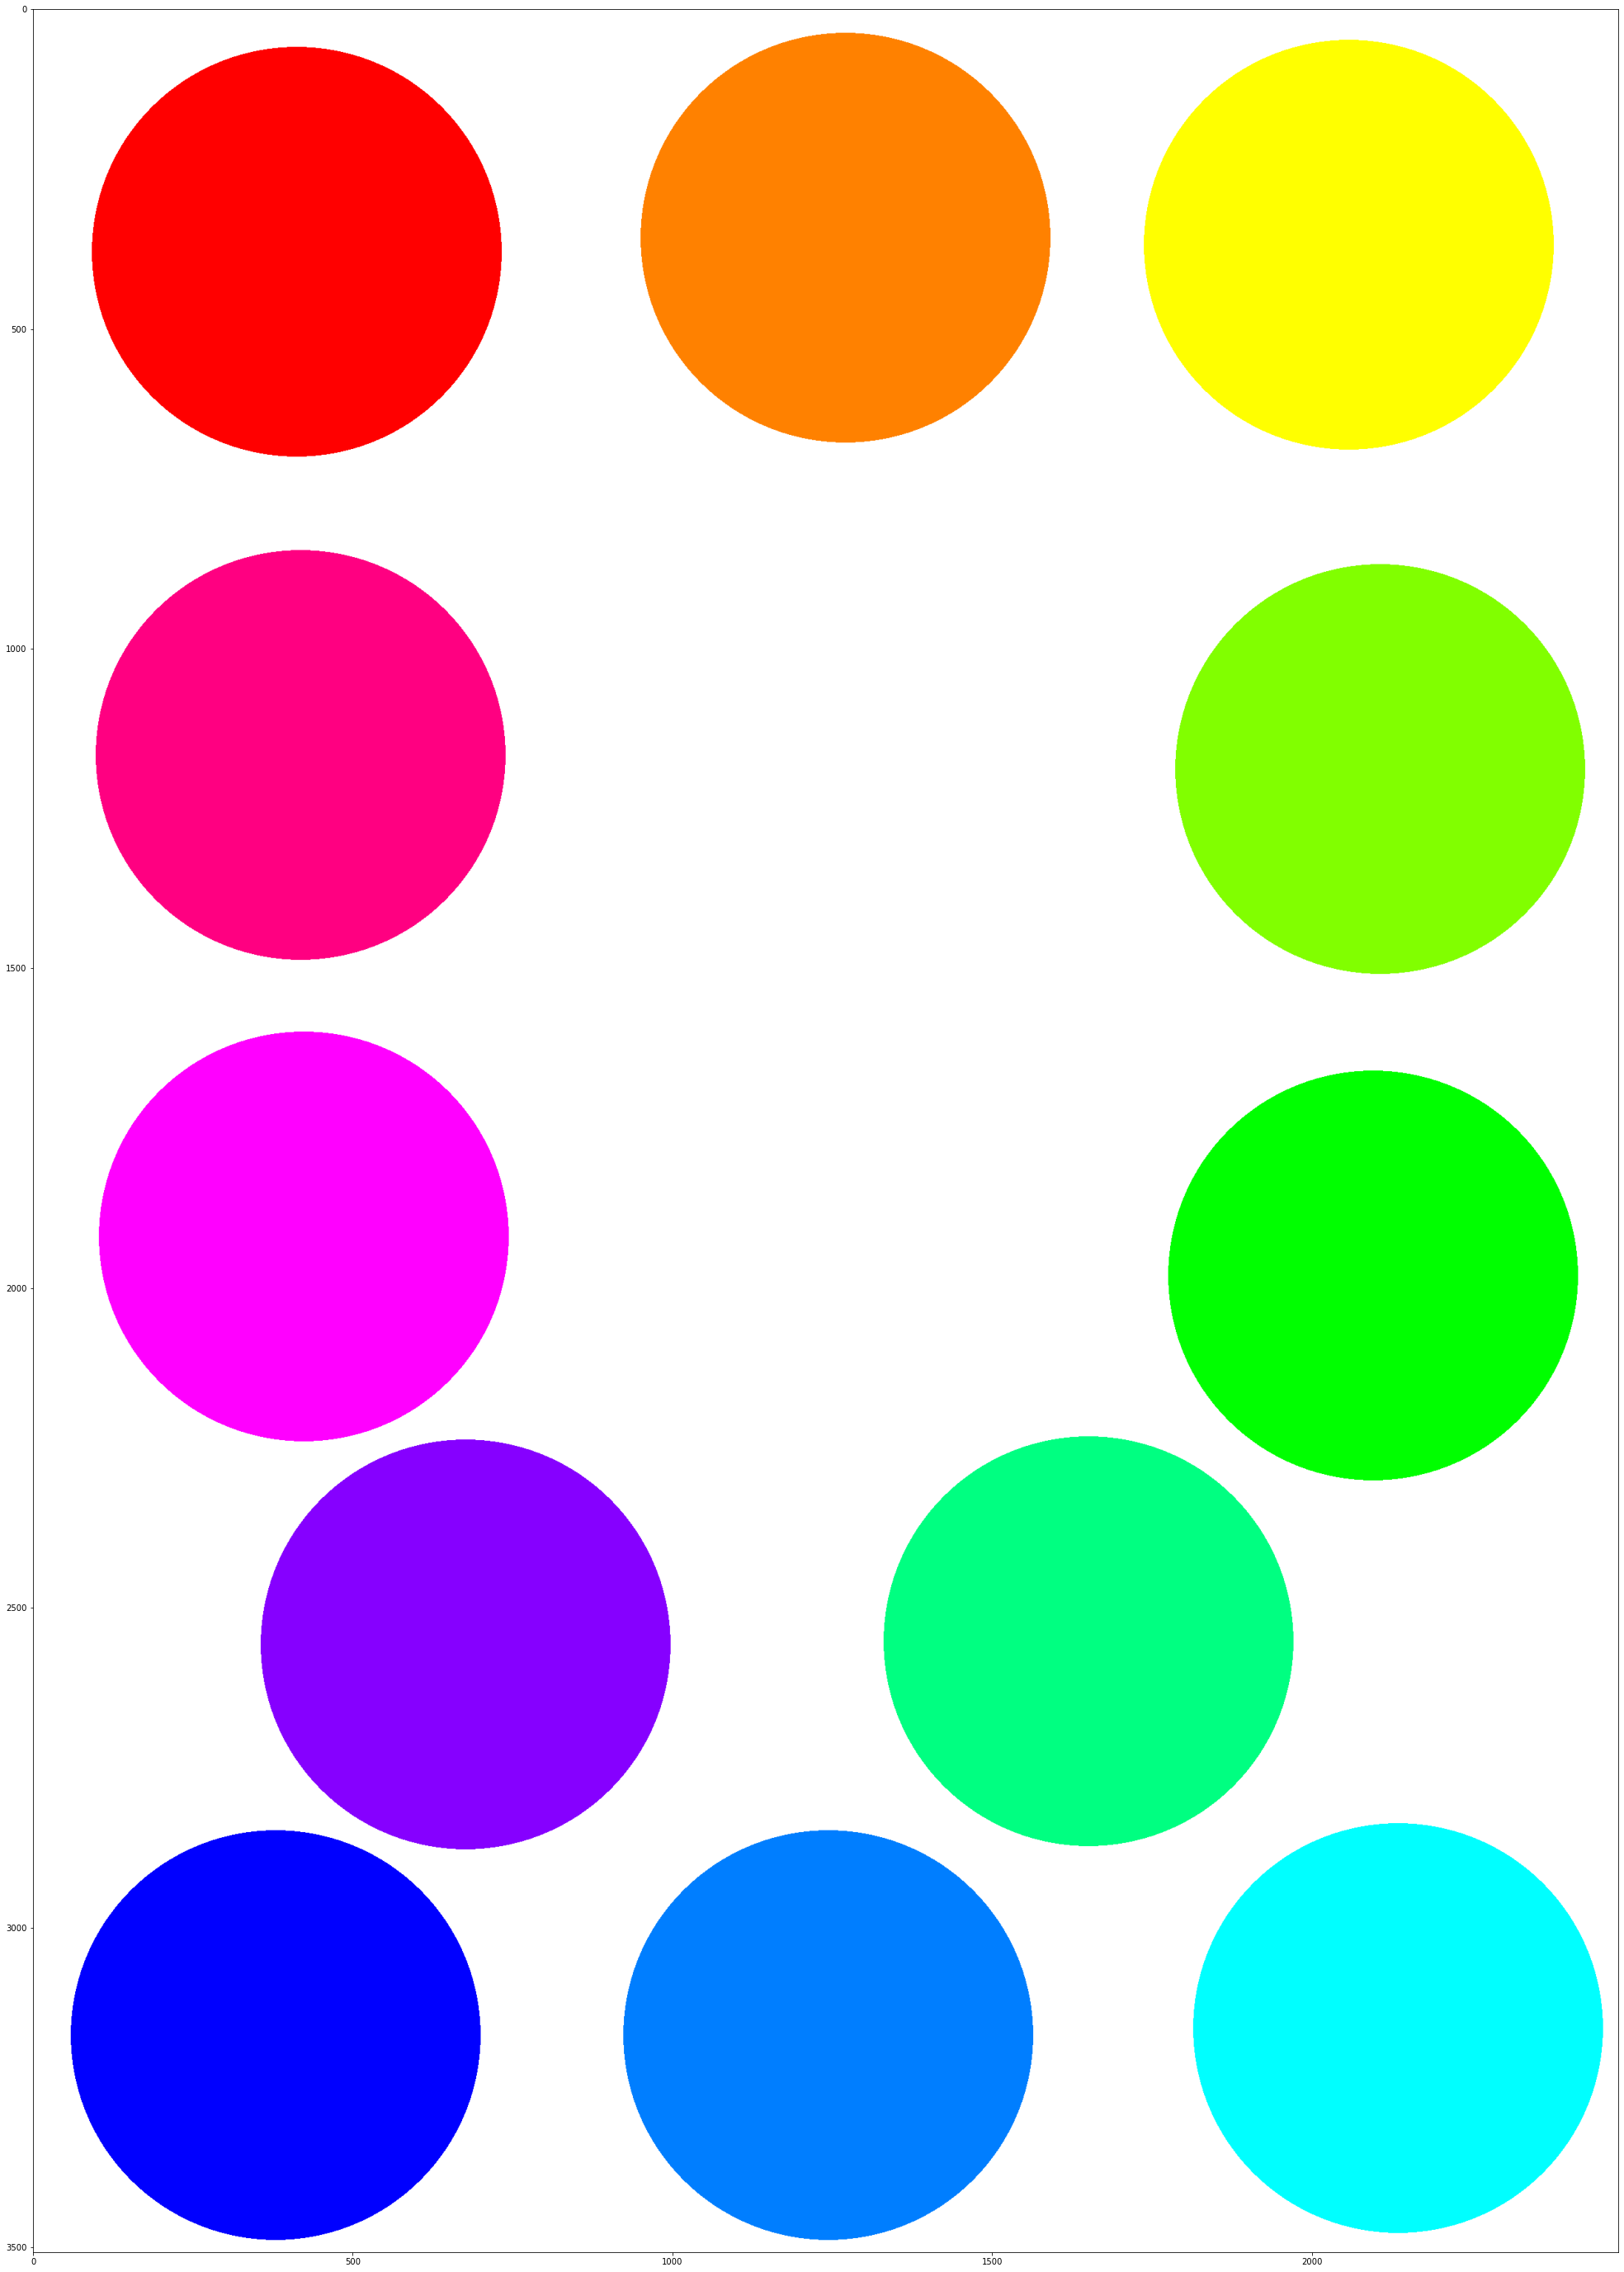

In [1]:
import robot_color_tracking as track

tracker = track.RobotColorTracking(binaryThreshold = 80, hueTolerance = 10, debug=True, nbr_colors=12)

tracker.track('../img/divisao-por-cores.png')
tracker.printRobotLocation()

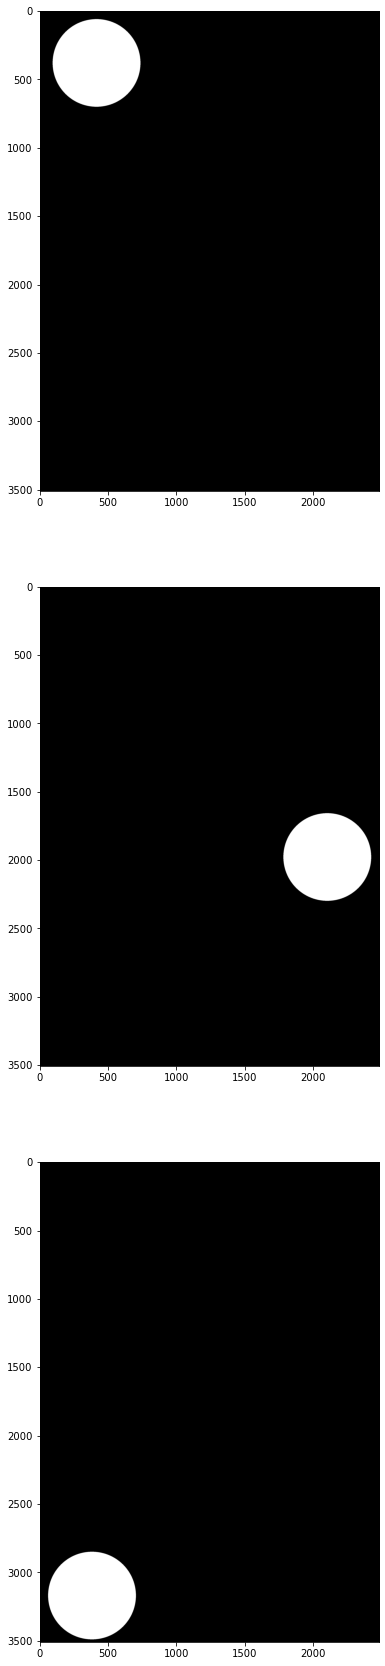

In [2]:
#print(tracker.getPoseByColor(track.Colors.blue))
from pylab import *
figure(figsize=(30,30))
for i in range(3):
    subplot(3,2,2*i+1)
    tracker.printSegmentedImage(i)
    #subplot(3,2,2*i+2)
    #tracker.printLabel(i)

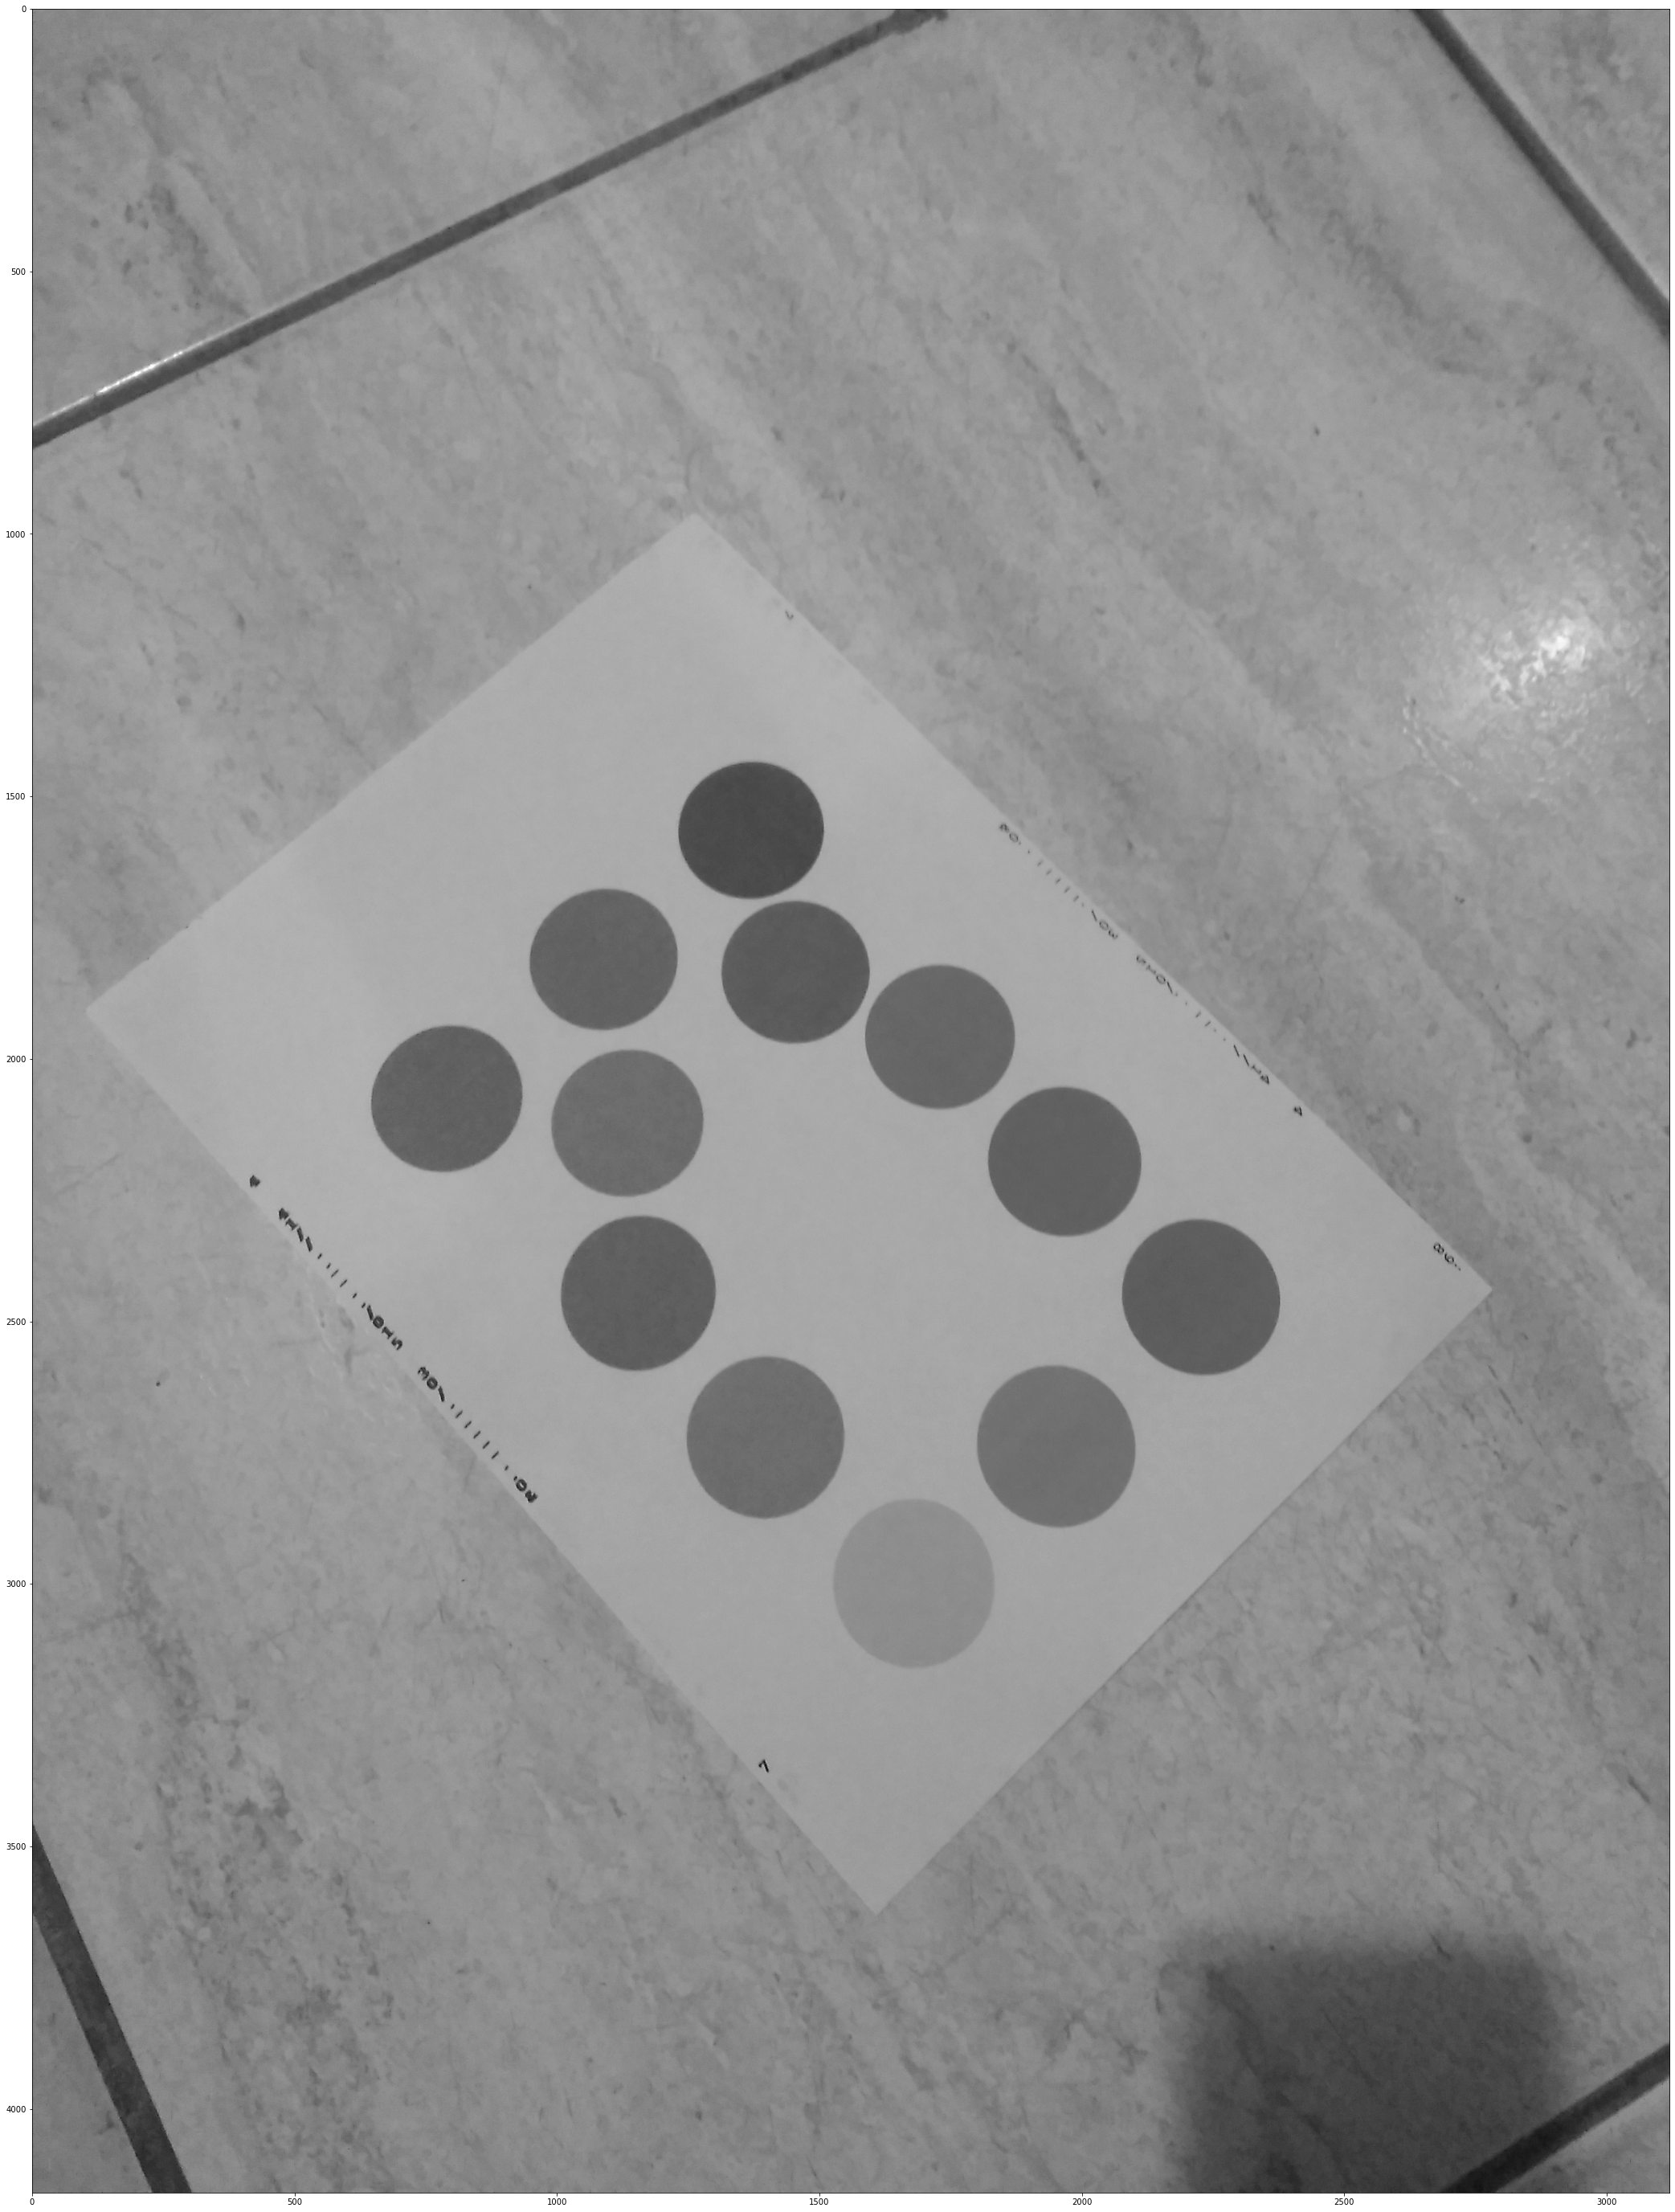

In [5]:
from scipy import *
from pylab import *
from numpy import *
from PIL import Image
import cv2
from scipy.ndimage import measurements, morphology, filters

abacate = cv2.cvtColor(cv2.imread('../img/papel1.jpg'), cv2.COLOR_BGR2GRAY)
#abacate = cv2.cvtColor(abacate, cv2.COLOR_HSV2BGR)
#abacate[:,:,0] = filters.gaussian_filter(abacate[:,:,0], 10)
#abacate[:,:,1] = filters.gaussian_filter(abacate[:,:,1], 10)
#abacate[:,:,2] = filters.gaussian_filter(abacate[:,:,2], 10)
figure(figsize=(50,50))
gray()
imshow(abacate)

In [2]:
import numpy as np
import cv2 as cv
from scipy import *
from pylab import *

img = cv.imread('../img/papel3.jpg')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp = sift.detect(gray,None)
img=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imwrite('sift_keypoints.jpg',img)

True

In [1]:
import sys
import cv2 as cv
import numpy as np

def main(argv):
    
    default_file = 'smarties.png'
    filename = argv[0] if len(argv) > 0 else default_file
    # Loads an image
    #src = cv.imread(cv.samples.findFile(filename), cv.IMREAD_COLOR)
    src = cv.imread('../img/papel2.jpg', cv.IMREAD_COLOR)
    # Check if image is loaded fine
    if src is None:
        print ('Error opening image!')
        print ('Usage: hough_circle.py [image_name -- default ' + default_file + '] \n')
        return -1
    
    #image = src
    #color = 120
    #image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    #image[:,:,2] = (image[:,:,0] >= color - 10) * image[:,:,2]
    #image[:,:,2] = (image[:,:,0] < color + 10) * image[:,:,2]
    #image[:,:,2] = (image[:,:,1] > 60) * image[:,:,2]
    #gray = cv.cvtColor(cv.cvtColor(image, cv.COLOR_HSV2BGR),cv.COLOR_BGR2GRAY)
    gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    
    #cv.namedWindow('image_before',cv.WINDOW_NORMAL)
    #cv.resizeWindow('image_before', 600,600)
    #cv.imshow('image_before', gray)
    #cv.waitKey(0)
    #cv.destroyAllWindows()
    
    
    gray = cv.medianBlur(gray, 5)
    
    
    rows = gray.shape[0]
    circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, rows / 8,
                               param1=70, param2=30,
                               minRadius=100, maxRadius=500)
    
    cv.namedWindow('image',cv.WINDOW_NORMAL)
    cv.resizeWindow('image', 600,600)
    print(circles.shape)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            # circle center
            cv.circle(src, center, 1, (0, 100, 100), 3)
            # circle outline
            radius = i[2]
            cv.circle(src, center, radius, (255, 0, 255), 3)
    
    #gray = cv.cvtColor(gray, cv.COLOR_GRAY2RGB)
    cv.imshow('image',src)
    cv.waitKey(0)
    cv.destroyAllWindows()
    
    return 0

In [3]:
main('')

(1, 5, 3)


0